In [50]:
# Download library for text cleaning
!pip install nltk


In [51]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
# Download csv file
import pandas as pd
data = pd.read_csv(r"3.Text cleaning/tweets_Ocean.csv")
# r stands for "raw" and will cause backslashes in the string to be interpreted as actual backslashes rather than special characters.
data.head()

,Unnamed: 0,Tweet Id,user,location,Tweets
0,0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...
1,1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...
2,2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...
3,3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab..."
4,4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...


In [53]:
# Check for null values in tweets column
data['Tweets'].isnull().sum()

0

In [54]:
# Above dataframe is showing unknown column. Here, I am dropping that and picked the other three
data = data.iloc[:, 1:] #every line and from the 2nd column till the end
data.head()



,Tweet Id,user,location,Tweets
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab..."
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...


In [55]:
# Display first 5 records in the form of list
data['Tweets'].head().tolist()



['MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For #WorldOceansDay via @forbes https://t.co/PvPjAaLPQg',
 'MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For #WorldOceansDay via @forbes https://t.co/PvPjAaLPQg',
 'The Ocean Based Climate Solution Act is a bold action to protect the health of our ocean and coastal communities, promote ocean resiliency, spur clean energy research, and protect our shorelines. Support the bill by signing our letter to legislators. https://t.co/gAv3zeXBkA https://t.co/ZxPBewMUru',
 'Climate change, pollution, overfishing and habitat destruction threaten the health of the ocean and the blue economy. On #WorldOceanDay, we explore the ideas and solutions that could accelerate the shift towards a sustainable ocean economy: https://t.co/bPaV685sdv',
 'Its World Ocean Day today.\nLets end the waves of waste.\nLets beat plastic pollution!\n\n#worldgreenline #WorldOceansDay #ClimateEmergency #OxygenBank #waragainstp

In [56]:
# Remove URL from Tweets
import re #stands for regular expression
data['Tweets without URL'] = data['Tweets'].apply(lambda x : re.sub(r'https?:\/\/\S*',"",x))
#re.sub(pattern, repl, string, count=0, flags=0)
#Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl.

# Another examples
# result = re.sub('abc',  '',    input)           # Delete pattern abc
# result = re.sub('abc',  'def', input)           # Replace pattern abc -> def
# result = re.sub(r'\s+', ' ',   input)           # Eliminate duplicate whitespaces using wildcards
# result = re.sub('abc(def)ghi', r'\1', input)    # Replace a string with a part of itself

data.head()

,Tweet Id,user,location,Tweets,Tweets without URL
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...,The Ocean Based Climate Solution Act is a bold...
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab...","Climate change, pollution, overfishing and hab..."
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...,Its World Ocean Day today.\nLets end the waves...


In [57]:
data['Tweets without URL'].head().tolist()



['MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For #WorldOceansDay via @forbes ',
 'MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For #WorldOceansDay via @forbes ',
 'The Ocean Based Climate Solution Act is a bold action to protect the health of our ocean and coastal communities, promote ocean resiliency, spur clean energy research, and protect our shorelines. Support the bill by signing our letter to legislators.  ',
 'Climate change, pollution, overfishing and habitat destruction threaten the health of the ocean and the blue economy. On #WorldOceanDay, we explore the ideas and solutions that could accelerate the shift towards a sustainable ocean economy: ',
 'Its World Ocean Day today.\nLets end the waves of waste.\nLets beat plastic pollution!\n\n#worldgreenline #WorldOceansDay #ClimateEmergency #OxygenBank #waragainstplastic #environment #Wgl #waragainstplastic ']

In [58]:
# Removing special characters and numbers
data['Tweets without special characters'] = data['Tweets without URL'].apply(lambda x : re.sub("[^(a-z)^(A-Z)^(0-9)^%\s]",'',x))
data['Tweets without special characters'].head().tolist()



['MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For WorldOceansDay via forbes ',
 'MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For WorldOceansDay via forbes ',
 'The Ocean Based Climate Solution Act is a bold action to protect the health of our ocean and coastal communities promote ocean resiliency spur clean energy research and protect our shorelines Support the bill by signing our letter to legislators  ',
 'Climate change pollution overfishing and habitat destruction threaten the health of the ocean and the blue economy On WorldOceanDay we explore the ideas and solutions that could accelerate the shift towards a sustainable ocean economy ',
 'Its World Ocean Day today\nLets end the waves of waste\nLets beat plastic pollution\n\nworldgreenline WorldOceansDay ClimateEmergency OxygenBank waragainstplastic environment Wgl waragainstplastic ']

In [59]:
# Removing \n (new line character)
data['Tweets without special characters'] = data['Tweets without special characters'].apply(lambda x : re.sub('\n',' ',x))
data['Tweets without special characters'].head().tolist()


['MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For WorldOceansDay via forbes ',
 'MerMade Launches Recycling Bins Made With 100% Certified Ocean Plastic For WorldOceansDay via forbes ',
 'The Ocean Based Climate Solution Act is a bold action to protect the health of our ocean and coastal communities promote ocean resiliency spur clean energy research and protect our shorelines Support the bill by signing our letter to legislators  ',
 'Climate change pollution overfishing and habitat destruction threaten the health of the ocean and the blue economy On WorldOceanDay we explore the ideas and solutions that could accelerate the shift towards a sustainable ocean economy ',
 'Its World Ocean Day today Lets end the waves of waste Lets beat plastic pollution  worldgreenline WorldOceansDay ClimateEmergency OxygenBank waragainstplastic environment Wgl waragainstplastic ']

In [60]:
# Convert the tweets into lower case
data['Tweets without special characters'] = data['Tweets without special characters'].str.lower()
data.head()



,Tweet Id,user,location,Tweets,Tweets without URL,Tweets without special characters
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...,The Ocean Based Climate Solution Act is a bold...,the ocean based climate solution act is a bold...
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab...","Climate change, pollution, overfishing and hab...",climate change pollution overfishing and habit...
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...,Its World Ocean Day today.\nLets end the waves...,its world ocean day today lets end the waves o...


In [61]:
# Stopwords are basically a set of commonly used words in any language, not just English like it, in, how, we etc. It is worth to remove these words from tweets or from text because it will unnecessarily take storage and computing power despite of no use.
# Remove stopwords
stopword = nltk.corpus.stopwords.words('english')
data['Tweets without stopwords'] = data['Tweets without special characters'].apply(lambda x : " ".join(word for word in x.split() if word not in stopword))
data.head()


,Tweet Id,user,location,Tweets,Tweets without URL,Tweets without special characters,Tweets without stopwords
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...,The Ocean Based Climate Solution Act is a bold...,the ocean based climate solution act is a bold...,ocean based climate solution act bold action p...
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab...","Climate change, pollution, overfishing and hab...",climate change pollution overfishing and habit...,climate change pollution overfishing habitat d...
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...,Its World Ocean Day today.\nLets end the waves...,its world ocean day today lets end the waves o...,world ocean day today lets end waves waste let...


In [62]:
# Download wordcloud
!pip install wordcloud

In [64]:
# Tokenization: It is important to convert text into tokens before transforming it into vectors. Vectors are required to train ML/DL models. Divide tweets into tokens
data['Tweet_tokenized'] = data['Tweets without stopwords'].apply(lambda x:re.split('\W+',x))
data.head()



,Tweet Id,user,location,Tweets,Tweets without URL,Tweets without special characters,Tweets without stopwords,Tweet_tokenized
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...,"[mermade, launches, recycling, bins, made, 100..."
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...,"[mermade, launches, recycling, bins, made, 100..."
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...,The Ocean Based Climate Solution Act is a bold...,the ocean based climate solution act is a bold...,ocean based climate solution act bold action p...,"[ocean, based, climate, solution, act, bold, a..."
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab...","Climate change, pollution, overfishing and hab...",climate change pollution overfishing and habit...,climate change pollution overfishing habitat d...,"[climate, change, pollution, overfishing, habi..."
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...,Its World Ocean Day today.\nLets end the waves...,its world ocean day today lets end the waves o...,world ocean day today lets end waves waste let...,"[world, ocean, day, today, lets, end, waves, w..."


In [65]:
# Stemming is the process of reducing a word to its word stem. For example, the stem of the words studied🡪studi, studying🡪study
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
data['Tweet_stemmed'] = data['Tweet_tokenized'].apply(lambda x: stemming(x))
data.head()

,Tweet Id,user,location,Tweets,Tweets without URL,Tweets without special characters,Tweets without stopwords,Tweet_tokenized,Tweet_stemmed
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...,"[mermade, launches, recycling, bins, made, 100...","[mermad, launch, recycl, bin, made, 100, certi..."
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...,"[mermade, launches, recycling, bins, made, 100...","[mermad, launch, recycl, bin, made, 100, certi..."
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...,The Ocean Based Climate Solution Act is a bold...,the ocean based climate solution act is a bold...,ocean based climate solution act bold action p...,"[ocean, based, climate, solution, act, bold, a...","[ocean, base, climat, solut, act, bold, action..."
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab...","Climate change, pollution, overfishing and hab...",climate change pollution overfishing and habit...,climate change pollution overfishing habitat d...,"[climate, change, pollution, overfishing, habi...","[climat, chang, pollut, overfish, habitat, des..."
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...,Its World Ocean Day today.\nLets end the waves...,its world ocean day today lets end the waves o...,world ocean day today lets end waves waste let...,"[world, ocean, day, today, lets, end, waves, w...","[world, ocean, day, today, let, end, wave, was..."


In [66]:
nltk.download('wordnet')
# Lemmatization considers the context and converts the word to its meaningful base form
# Performing Lemmatization
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
data['Tweet_lemmatized'] = data['Tweet_tokenized'].apply(lambda x: lemmatizer(x))
data.head()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,Tweet Id,user,location,Tweets,Tweets without URL,Tweets without special characters,Tweets without stopwords,Tweet_tokenized,Tweet_stemmed,Tweet_lemmatized
0,1404816221950955528,JoMulhern1,Vancouver Island,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...,"[mermade, launches, recycling, bins, made, 100...","[mermad, launch, recycl, bin, made, 100, certi...","[mermade, launch, recycling, bin, made, 100, c..."
1,1404813092568064014,ecostrategy,Toronto & Sudbury,MerMade Launches Recycling Bins Made With 100%...,MerMade Launches Recycling Bins Made With 100%...,mermade launches recycling bins made with 100%...,mermade launches recycling bins made 100% cert...,"[mermade, launches, recycling, bins, made, 100...","[mermad, launch, recycl, bin, made, 100, certi...","[mermade, launch, recycling, bin, made, 100, c..."
2,1404785818577817600,OceanRiverInst,"Cambridge, MA",The Ocean Based Climate Solution Act is a bold...,The Ocean Based Climate Solution Act is a bold...,the ocean based climate solution act is a bold...,ocean based climate solution act bold action p...,"[ocean, based, climate, solution, act, bold, a...","[ocean, base, climat, solut, act, bold, action...","[ocean, based, climate, solution, act, bold, a..."
3,1404769735955320834,repenzall,"Lahore, Pakistan","Climate change, pollution, overfishing and hab...","Climate change, pollution, overfishing and hab...",climate change pollution overfishing and habit...,climate change pollution overfishing habitat d...,"[climate, change, pollution, overfishing, habi...","[climat, chang, pollut, overfish, habitat, des...","[climate, change, pollution, overfishing, habi..."
4,1404766717197180937,PritiranjanDash,India,Its World Ocean Day today.\nLets end the waves...,Its World Ocean Day today.\nLets end the waves...,its world ocean day today lets end the waves o...,world ocean day today lets end waves waste let...,"[world, ocean, day, today, lets, end, waves, w...","[world, ocean, day, today, let, end, wave, was...","[world, ocean, day, today, let, end, wave, was..."


(-0.5, 399.5, 199.5, -0.5)

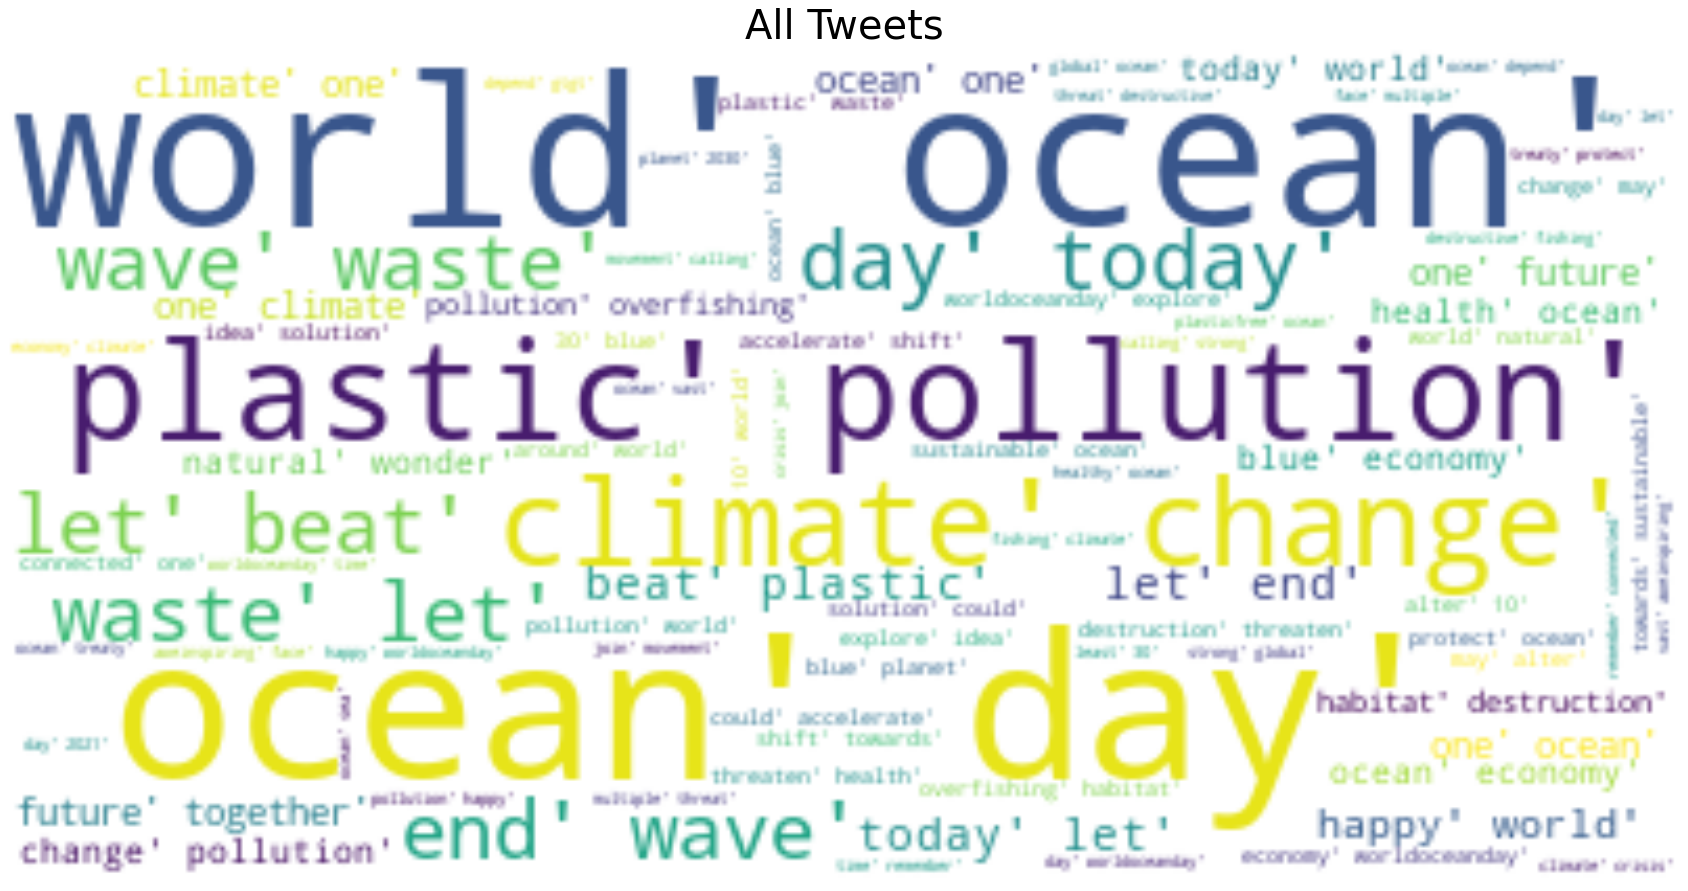

In [78]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
tweet_All = ''.join(str(review) for review in data['Tweet_lemmatized'])
fig, ax = plt.subplots(figsize = (30,30))

# Create and generate a word cloud image
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(tweet_All)
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=40)
ax.axis('off')


